In [1]:
library(Seurat)
library(ggplot2)
library(dplyr)
library(harmony)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Rcpp



To assess the impact of batch effect, we compared: 

    1. SCT transform before and after 
    2. Harmony correction before and after 

In [2]:
# load data
merged_VLP39_filtered <- readRDS("merged_VLP39_filtered.rds")

In [6]:
# save merged object
saveRDS(merged_VLP39_filtered, file = "/scratch/project_mnt/S0010/Yibi/HNC_fimmu/merged_VLP39_filtered.rds")

# 1.4 UMAP to show batch effect

In [57]:
colnames(merged_VLP39_filtered@meta.data)

[1] "orig.ident"       "nCount_Spatial"   "nFeature_Spatial" "slide"           
 [5] "individual"       "nCount_SCT"       "nFeature_SCT"     "cell_type"       
 [9] "recurrent"        "tissues"          "sample_id"        "p16_status"      
[13] "tissue_site"      "sample_id_p"

In [6]:
table(merged_VLP39_filtered@meta.data$tissues)


  A1   A2   A3   B1   B2   C1   C2   C3   C4   D1   D2    N 
1125 1505  931 1716 1764  742  766  964  880 1637 1581    1 

In [3]:
# 1. Update metadata using case_match and filter out unmapped spots
merged_VLP39_filtered@meta.data <- merged_VLP39_filtered@meta.data %>%
  mutate(sample_id_p = case_match(tissues,
    "B2"    ~ "R1",
    "A2"    ~ "R2",
    "C1" ~ "R3_A",
    "C2" ~ "R3_B",
    "D2"    ~ "R4",
    "A1"    ~ "NR1",
    "C4"    ~ "NR2",
    "A3"    ~ "NR3",
    "B1"    ~ "NR4",
    "C3"    ~ "NR5",
    "D1"    ~ "NR6",
    .default = NA_character_  # Everything else becomes NA
  ))

# 2. Subset the Seurat object to remove rows where sample_id_p is NA
merged_VLP39_filtered <- subset(merged_VLP39_filtered, subset = !is.na(sample_id_p))

Warning message:
“Removing 1 cells missing data for vars requested”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Seurat objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Seurat objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not 

In [4]:
table(merged_VLP39_filtered$sample_id_p)


 NR1  NR2  NR3  NR4  NR5  NR6   R1   R2 R3_A R3_B   R4 
1125  880  931 1716  964 1637 1764 1505  742  766 1581 

In [5]:
merged_VLP39_filtered

An object of class Seurat 
35115 features across 13611 samples within 2 assays 
Active assay: SCT (17172 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: Spatial
 2 dimensional reductions calculated: pca, integrated.dr
 4 spatial fields of view present: slice1 slice1.2 slice1.3 slice1.4

In [49]:
# switch to Spatial assay
DefaultAssay(merged_VLP39_filtered) <- "Spatial"
# normalize data and scale data
merged_VLP39_filtered <- NormalizeData(merged_VLP39_filtered, assay = "Spatial", verbose = FALSE)
merged_VLP39_filtered <- ScaleData(merged_VLP39_filtered, assay = "Spatial", verbose = FALSE)
# find variable features
merged_VLP39_filtered <- FindVariableFeatures(merged_VLP39_filtered, assay = "Spatial", selection.method = "vst", nfeatures = 3000)



Finding variable features for layer counts.1

Finding variable features for layer counts.2

Finding variable features for layer counts.3

Finding variable features for layer counts.4



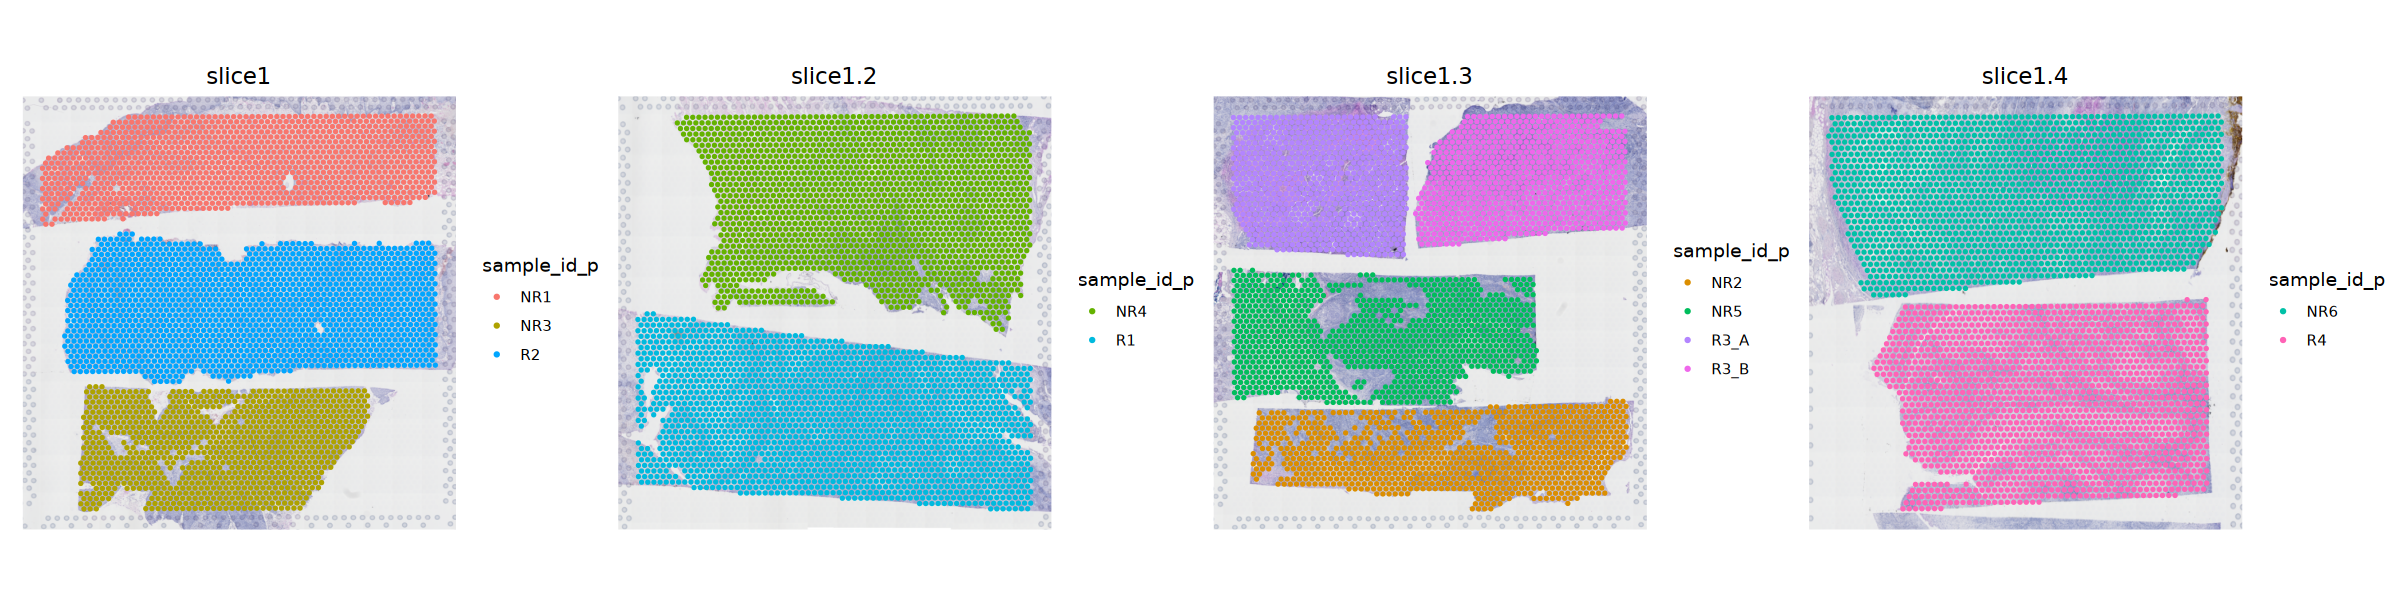

In [62]:
# Spatial feature plot for tissues column
options(repr.plot.width = 20, repr.plot.height = 5)
SpatialPlot(merged_VLP39_filtered, group.by = "sample_id_p") 

pcaspatial_ 1 
Positive:  JUP, SLC2A1, PERP, DSP, KRT16, PKP1, LAD1, S100A16, DSG3, SERPINB5 
	   TRIM29, TXN, KRT6B, NDRG1, TP63, FSCN1, PPIF, DSC2, FXYD3, NECTIN1 
	   RHOD, ANXA1, CSTB, SPINT2, MAL2, ESRP1, C6orf132, DSC3, JPT1, C19orf33 
Negative:  IGKC, IGHG2, JCHAIN, IGLC1, TTN, CKM, TCAP, BPIFB1, MB, HSPB6 
	   IGHG4, MYL1, DES, TNNC1, BPIFA1, PRR4, MYH2, MYL2, KLHL41, ENO3 
	   IGHA1, DMBT1, APOD, TNNT3, MUC5B, COX6A2, S100A1, TNNC2, MYLPF, MYBPC1 
pcaspatial_ 2 
Positive:  KRT14, KRTDAP, GJB2, DSG1, SBSN, KLK8, PI3, FABP5, ITGA3, GJB6 
	   MDFI, CNFN, KLK10, COL17A1, S100A7, PPP2R2C, DMKN, ISG15, KLK7, HEPHL1 
	   ITGA6, KRT1, PTHLH, TGM1, SLC7A5, KRT6B, ID1, KLK5, RHCG, FAM83A 
Negative:  MUC4, UPK1B, CLDN3, TSPAN1, ALPL, HS3ST6, EYA2, FAM3B, ABCA13, ATP13A4 
	   PNMA5, LGI3, MUC16, FETUB, C15orf48, CEL, FOXA1, CALML5, ABCC5, HLA-DQA1 
	   SLC4A11, ZBTB7C, FBP1, FUT6, BMP3, KRT8, SCNN1A, FMO2, CST1, KRT7 
pcaspatial_ 3 
Positive:  SLPI, CRYAB, TGM3, SPRR3, CRCT1, EEF1A2, CNFN

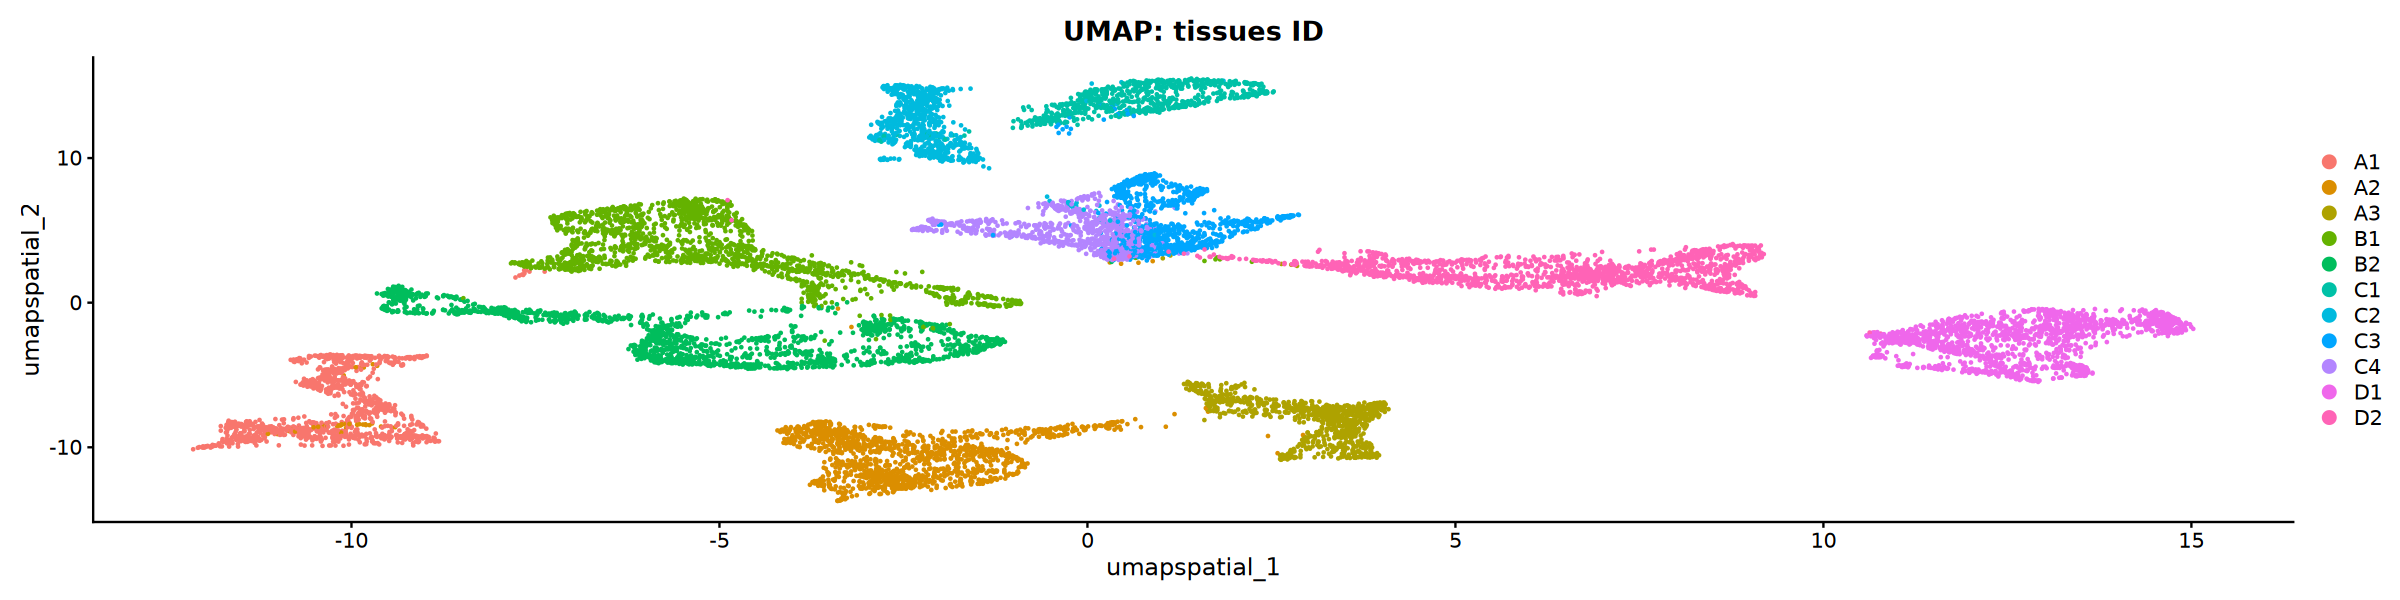

In [ ]:

# redo pca and umap plot with Spatial assay
# 1. Run PCA - specificy a unique key to avoid the 'PC_' warning
merged_VLP39_filtered <- RunPCA(merged_VLP39_filtered, 
                                assay = "Spatial", 
                                reduction.name = "pca_spatial", 
                                reduction.key = "pcaspatial_")

# 2. Run UMAP - you must provide 'dims' when using a reduction
merged_VLP39_filtered <- RunUMAP(merged_VLP39_filtered, 
                                 reduction = "pca_spatial", 
                                 dims = 1:30, 
                                 reduction.name = "umap_spatial")



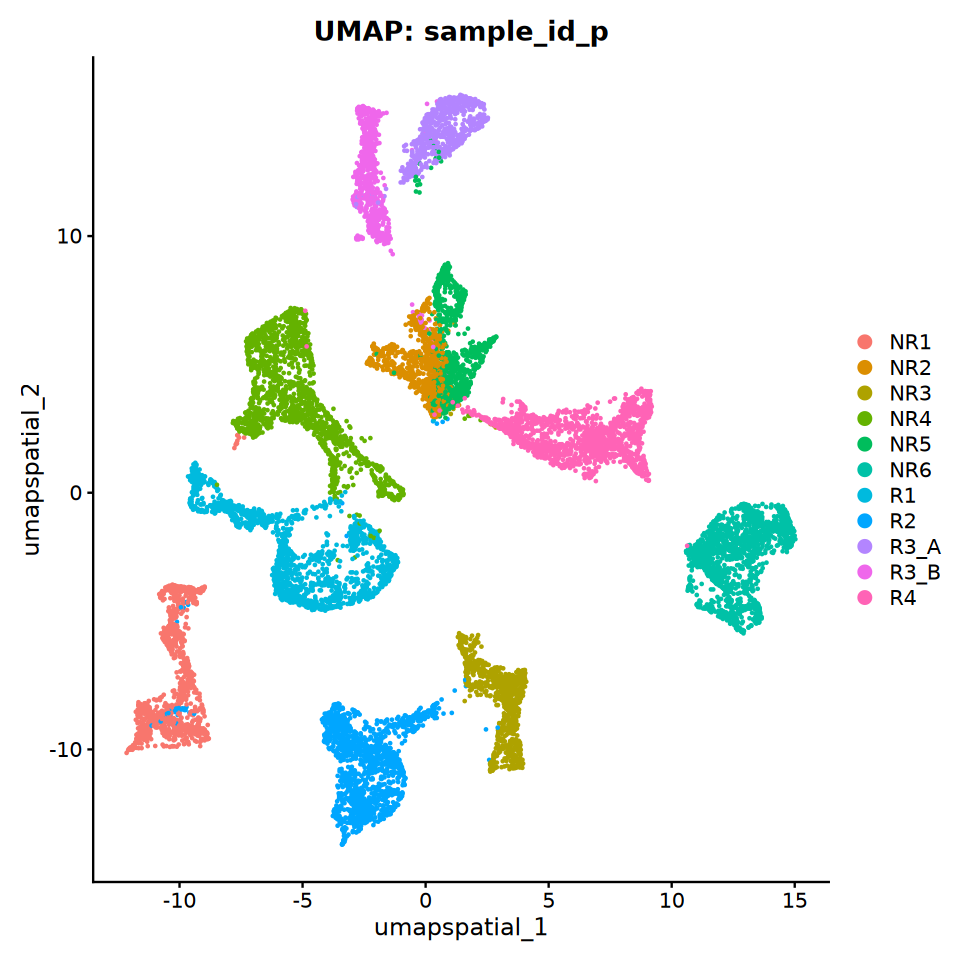

In [63]:
options(repr.plot.width = 8, repr.plot.height = 8)
# 3. Plot UMAP
DimPlot(merged_VLP39_filtered, reduction = "umap_spatial", group.by = "sample_id_p") + 
  ggtitle("UMAP: sample_id_p")

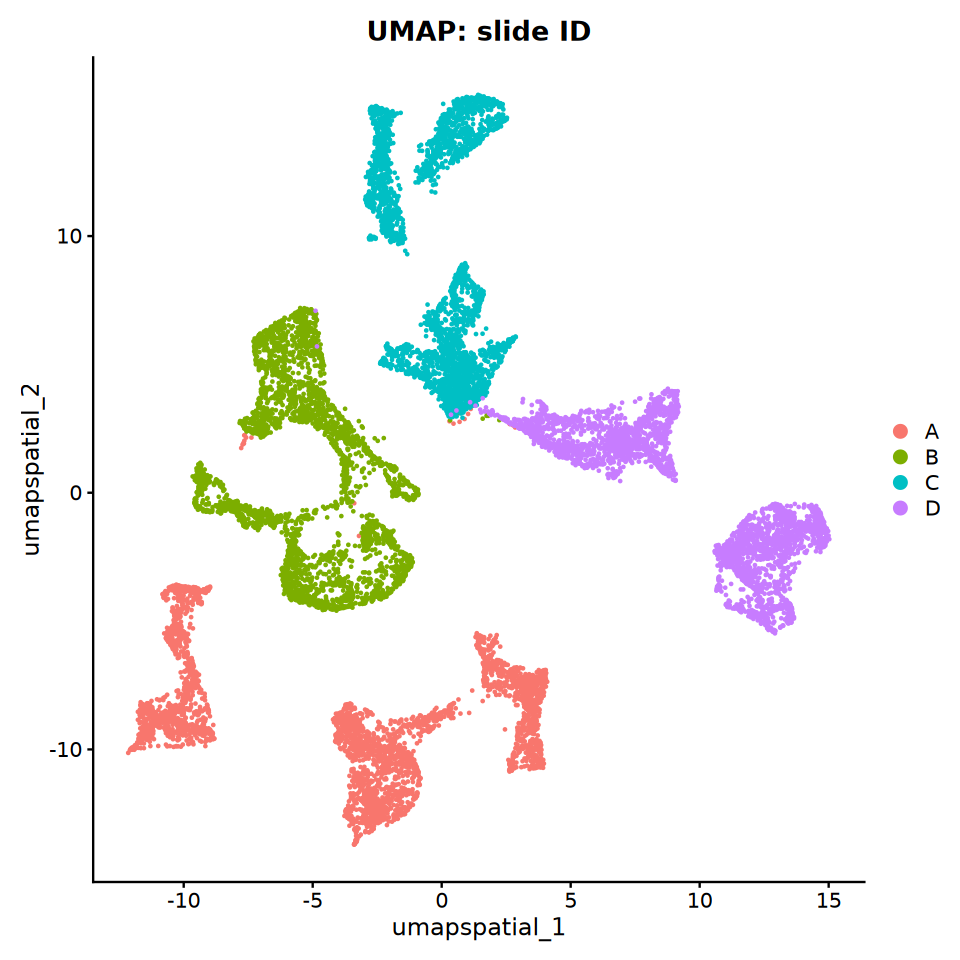

In [56]:
DimPlot(merged_VLP39_filtered, reduction = "umap_spatial", group.by = "slide") + 
  ggtitle("UMAP: slide ID")

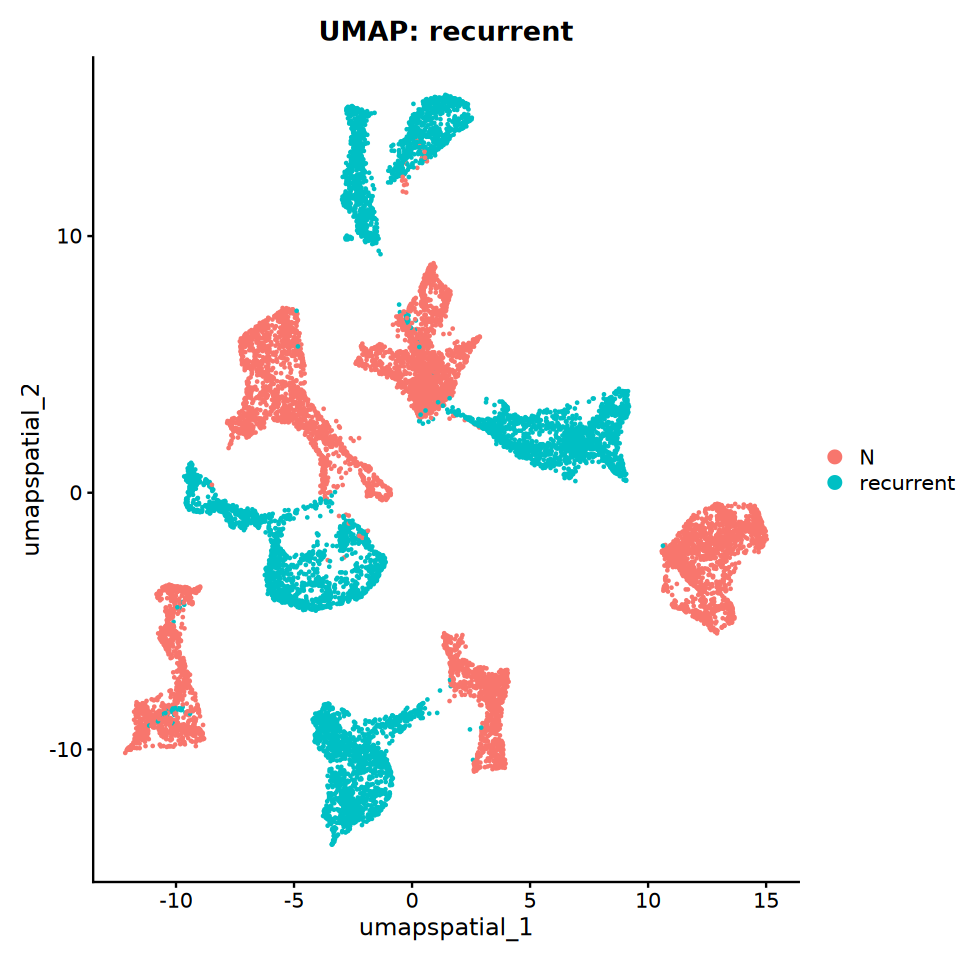

In [58]:

DimPlot(merged_VLP39_filtered, reduction = "umap_spatial", group.by = "recurrent") + 
  ggtitle("UMAP: recurrent")

# 1.5 deconvolution comparing to pathologist labels

In [4]:
# load CARD deconvolution results
CARD_A<-read.delim("CARD_A_celltype_newref_prop.csv", sep=",", header=TRUE, row.names=1)
CARD_B<-read.delim("CARD_B_celltype_newref_prop.csv", sep=",", header=TRUE, row.names=1)
CARD_C<-read.delim("CARD_C_celltype_newref_prop.csv", sep=",", header=TRUE, row.names=1)
CARD_D<-read.delim("CARD_D_celltype_newref_prop.csv", sep=",", header=TRUE, row.names=1)

In [5]:
# add "A_" prefix to colnames of CARD_A
colnames(CARD_A) <- paste0("A_", colnames(CARD_A))
colnames(CARD_B) <- paste0("B_", colnames(CARD_B))
colnames(CARD_C) <- paste0("C_", colnames(CARD_C))
colnames(CARD_D) <- paste0("D_", colnames(CARD_D))

In [6]:
CARD_master <- cbind(CARD_A, CARD_B, CARD_C, CARD_D)

In [9]:
rownames(CARD_master)

[1] "T.cells"           "Malignant.cells"   "B_Plasma.cells"   
 [4] "Endothelial.cells" "Fibroblasts"       "Macrophages"      
 [7] "Dendritic.cells"   "Mast.cells"        "Myocytes"         
[10] "Epithelial.cells"

In [10]:
table(merged_VLP39_filtered@meta.data$cell_type)


     benign_salivary_tissue                immune_cells 
                        113                         554 
              normal_mucosa                      stroma 
                        147                        2981 
stroma_TIL_tumour_interface                      tumour 
                        618                        8042 
              tumour_stroma     tumour-stroma_interface 
                        237                         919 

In [7]:
library(Seurat)
library(ggplot2)
library(dplyr)
library(tidyr)
library(tibble)

# 1. Prepare Data
# Extract Pathologist Labels (columns)
meta_data <- merged_VLP39_filtered@meta.data %>% 
  rownames_to_column("spot_id") %>%
  select(spot_id, pathologist_label = cell_type,recurrent,sample_id_p)

# Extract Deconvolution Results (rows) and transpose
deconv_data <- as.data.frame(t(CARD_master)) %>%
  rownames_to_column("spot_id") %>%
  # FIX: Replace dots with dashes to match Seurat spot IDs
  mutate(spot_id = gsub("\\.", "-", spot_id))

# Merge the two datasets
merged_df <- inner_join(meta_data, deconv_data, by = "spot_id")

# Define the deconvolution cell types (excluding ID columns)
deconv_types <- rownames(CARD_master)

# 2. Calculate Background Thresholds (Global Mean per Deconvolution Type)
global_means <- merged_df %>%
  summarise(across(all_of(deconv_types), mean)) %>%
  pivot_longer(cols = everything(), names_to = "Deconv_Type", values_to = "Global_Mean")

# 3. Calculate Plot Metrics
plot_data <- merged_df %>%
  pivot_longer(cols = all_of(deconv_types), names_to = "Deconv_Type", values_to = "Proportion") %>%
  left_join(global_means, by = "Deconv_Type") %>%
  group_by(pathologist_label, Deconv_Type) %>%
  summarise(
    # Size: Average percentage of deconvolution label for that pathologist label
    Avg_Prop = mean(Proportion),
    # Color: Percentage of spots higher than the global average (background)
    Pct_Over_Background = mean(Proportion > Global_Mean),
    .groups = "drop"
  )

# 4. Generate Bubble Plot
p<-ggplot(plot_data, aes(x = pathologist_label, y = Deconv_Type)) +
  geom_point(aes(size = Avg_Prop, color = Pct_Over_Background)) +
  scale_size_continuous(range = c(1, 8), name = "Avg Proportion") +
  scale_color_gradient(low = "grey90", high = "red", labels = scales::percent, name = "% Spots > Bg") +
  theme_minimal() +
  labs(x = "Pathologist Label", y = "Deconvolution Label") +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1),
    panel.grid.major = element_line(color = "grey95")
  )
ggsave("Sfigure_pathologist_deconv_bubble.pdf", plot = p, width = 6, height = 6, dpi = 300)

In [12]:
merged_df

spot_id,pathologist_label,recurrent,sample_id_p,T.cells,Malignant.cells,B_Plasma.cells,Endothelial.cells,Fibroblasts,Macrophages,Dendritic.cells,Mast.cells,Myocytes,Epithelial.cells
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A_AAACAATCTACTAGCA-1,stroma,N,NR1,0.0339156820,0.24932546,1.784612e-02,0.050301775,0.3875210121,2.733696e-02,9.828869e-03,0.0301461727,1.327696e-03,0.192450257
A_AAACACCAATAACTGC-1,tumour,N,NR3,0.1872606251,0.54316466,1.889868e-02,0.020609050,0.0092063586,2.670943e-02,7.687265e-03,0.0212415231,1.017298e-02,0.155049433
A_AAACAGAGCGACTCCT-1,stroma,N,NR1,0.0001651826,0.04482861,2.086194e-03,0.001045572,0.9089376794,4.949210e-06,3.219701e-06,0.0358582111,1.513925e-08,0.007070366
A_AAACAGCTTTCAGAAG-1,tumour,recurrent,R2,0.0012202058,0.74096249,6.365967e-05,0.003430874,0.0016715207,1.377202e-05,3.995428e-05,0.0010355791,1.163261e-04,0.251445616
A_AAACAGGGTCTATATT-1,tumour,recurrent,R2,0.1961675984,0.58804007,6.194775e-03,0.004888528,0.0226403299,1.347987e-05,4.570560e-04,0.0150530893,3.505476e-03,0.163039600
A_AAACAGTGTTCCTGGG-1,tumour,N,NR3,0.0599121639,0.34664561,4.515415e-02,0.094164211,0.3263481150,8.933175e-03,1.895184e-03,0.0326613796,1.332037e-03,0.082953975
A_AAACATTTCCCGGATT-1,tumour,N,NR3,0.1626337746,0.64791165,5.523490e-03,0.005526270,0.0011738993,8.703845e-04,2.163205e-03,0.0135438248,6.224599e-03,0.154428906
A_AAACCACTACACAGAT-1,stroma,N,NR1,0.0428459452,0.18335678,2.006255e-02,0.051468861,0.1512106866,1.172078e-01,1.240492e-02,0.0654893728,6.612408e-04,0.355291810
A_AAACCCGAACGAAATC-1,tumour,recurrent,R2,0.0284197717,0.55243393,3.195725e-03,0.005242917,0.0116911239,1.517945e-05,8.858221e-05,0.0050157250,2.867202e-03,0.391029848


In [16]:
table(merged_df$pathologist_label)


     benign_salivary_tissue                immune_cells 
                        113                         554 
              normal_mucosa                      stroma 
                        147                        2981 
stroma_TIL_tumour_interface                      tumour 
                        618                        8042 
              tumour_stroma     tumour-stroma_interface 
                        237                         919 

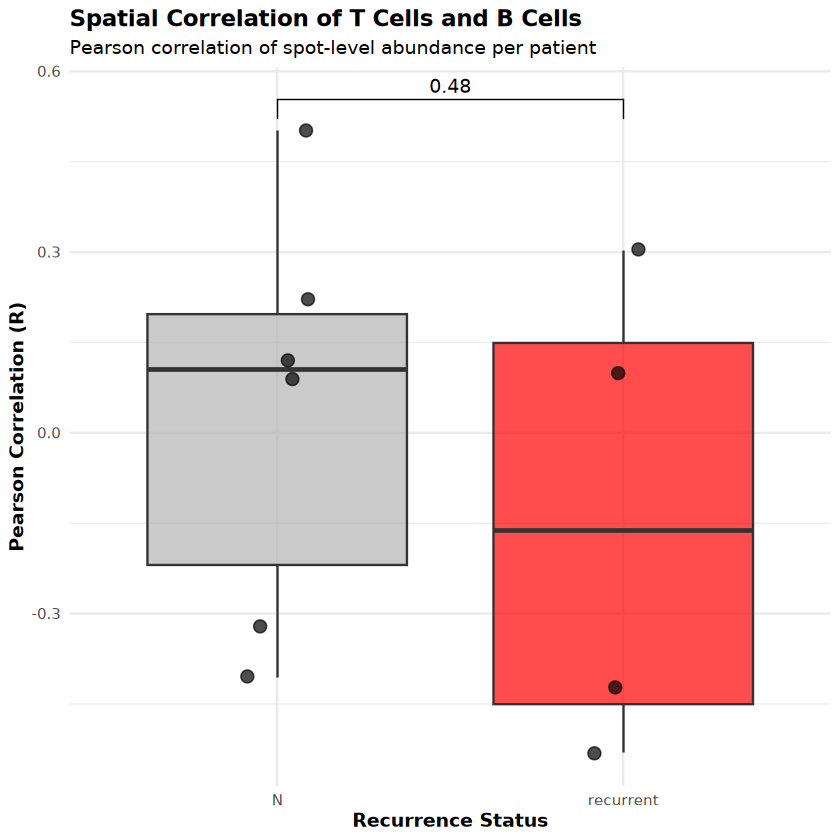

In [66]:
library(dplyr)
library(ggplot2)
library(ggpubr)
set.seed(123) # Set seed for reproducibility
# 1. Calculate Correlation per Sample
cor_data <- merged_df %>%
mutate(sample_id_p = gsub("_.*", "", sample_id_p)) %>%
  filter(pathologist_label %in% c("tumour","tumour_stroma","stroma_TIL_tumour_interface","tumour-stroma_interface")) %>%
  group_by(sample_id_p) %>%
  
  # 3. Create Pseudo-Replicates: 
  # Randomly assign each spot to replicate 1, 2, or 3
  # rep(1:3, length.out = n()) ensures an even split (balanced sizes)
  mutate(replicate = sample(rep(1:20, length.out = n()))) %>%
  ungroup() %>%
  
  # 4. Aggregate by Sample, Recurrence, AND the new Replicate ID
  group_by(sample_id_p, recurrent, replicate) %>%
    summarise(
    mean_T_cells = mean(T.cells, na.rm = TRUE),
    mean_B_Plasma = mean(B_Plasma.cells, na.rm = TRUE),
    .groups = "drop"
  ) %>%
  ungroup() %>%
  group_by(sample_id_p, recurrent) %>%
  summarise(
    # Pearson correlation between T cells and B cells for the spots in this sample
    # use="complete.obs" handles any potential missing values safely
    correlation = cor(mean_T_cells, mean_B_Plasma, method = "pearson", use = "complete.obs"),
    n_spots = n(), # Good practice to track sample size
    .groups = "drop"
  )

# 2. Generate Box Plot with Statistics
ggplot(cor_data, aes(x = recurrent, y = correlation, fill = recurrent)) +
  geom_boxplot(alpha = 0.7, outlier.shape = NA) +
  geom_jitter(width = 0.1, size = 3, alpha = 0.7) +
  
  # Add Statistical Test
  stat_compare_means(
    comparisons = list(c("N", "recurrent")),
    method = "wilcox.test",
    label = "p.format"
  ) +
  theme_minimal() +
  scale_fill_manual(values = c("N" = "grey70", "recurrent" = "red")) +
  labs(
    title = "Spatial Correlation of T Cells and B Cells",
    subtitle = "Pearson correlation of spot-level abundance per patient",
    x = "Recurrence Status",
    y = "Pearson Correlation (R)"
  ) +
  theme(
    legend.position = "none",
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  )

`geom_smooth()` using formula = 'y ~ x'


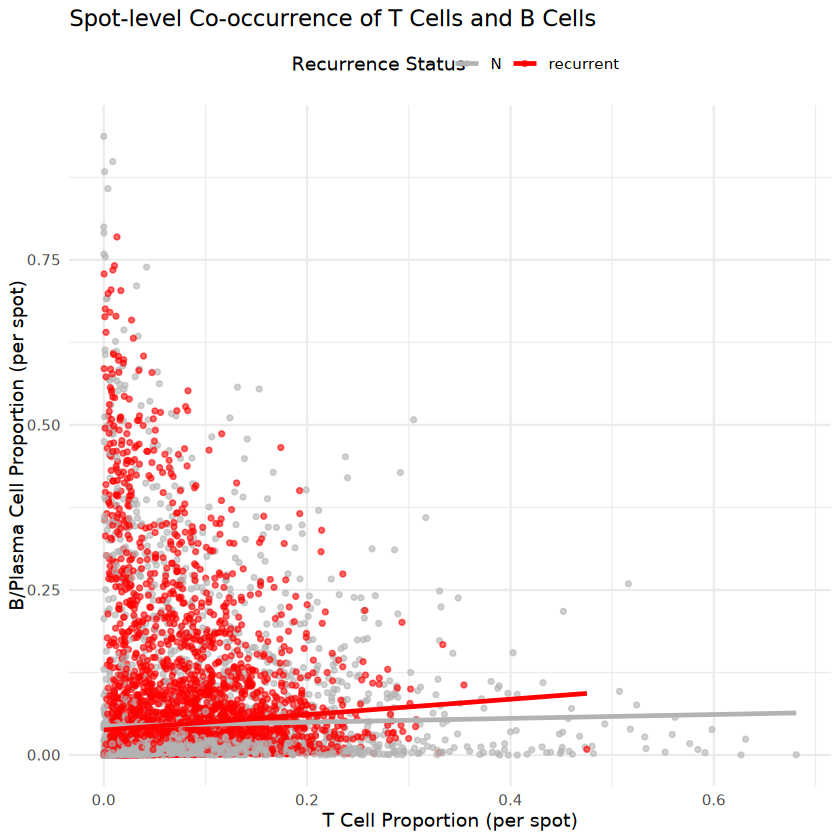

In [72]:
library(ggplot2)

# Generate Scatter Plot
ggplot(merged_df%>%mutate(sample_id_p = gsub("_.*", "", sample_id_p)) %>%
  filter(pathologist_label %in% c("tumour","tumour_stroma","stroma_TIL_tumour_interface","tumour-stroma_interface")), aes(x = T.cells, y = B_Plasma.cells, color = recurrent)) +
  # Use alpha to handle overplotting since there are many spots
  geom_point(size = 1, alpha = 0.6) + 
  
  # Add smooth lines to see the trend difference (optional, but helpful)
  geom_smooth(method = "lm", se = FALSE, aes(group = recurrent), size = 1) +
  
  scale_color_manual(values = c("N" = "grey70", "recurrent" = "red")) +
  theme_minimal() +
  labs(
    title = "Spot-level Co-occurrence of T Cells and B Cells",
    x = "T Cell Proportion (per spot)",
    y = "B/Plasma Cell Proportion (per spot)",
    color = "Recurrence Status"
  ) +
  theme(
    legend.position = "top"
  )

In [14]:
library(ggplot2)
library(dplyr)
library(viridis) # For elegant color scales

# 1. Prepare Data (Optional filtering if needed)
# ensuring we just have the two groups of interest
plot_data <- merged_df %>%
  filter(!is.na(recurrent))%>%mutate(sample_id_p = gsub("_.*", "", sample_id_p)) %>%
  filter(pathologist_label %in% c("tumour","tumour_stroma","stroma_TIL_tumour_interface","tumour-stroma_interface"))

# 2. Generate Density Plot
p<-ggplot(plot_data, aes(x = T.cells, y = B_Plasma.cells)) +
  # Calculate 2D kernel density estimate
  stat_density_2d(
    aes(fill = after_stat(level)), 
    geom = "polygon", 
    contour = TRUE,
    bins = 40 # Controls the number of contour levels (grid resolution)
  ) +
  
  # Facet by recurrence status
  facet_wrap(~ recurrent) +
  
  # Aesthetics
  scale_fill_viridis_c(option = "magma", name = "Density\nLevel") +
  theme_minimal() +
  labs(
    title = "Joint Density of T Cell and B Cell Proportions",
    subtitle = "Comparison between Non-recurrent (N) and Recurrent cases",
    x = "Proportion of T Cells",
    y = "Proportion of B/Plasma Cells"
  ) +
  theme(
    strip.text = element_text(size = 12, face = "bold"),
    legend.position = "right",
    panel.grid.minor = element_blank()
  ) +
  # Optional: Constrain axes to 0-1 since they are proportions
  coord_cartesian(xlim = c(0, .2), ylim = c(0, 0.05))

  ggsave("Sfigure_T_B_density.pdf", plot = p, width = 6, height = 6, dpi = 300)

Loading required package: viridisLite



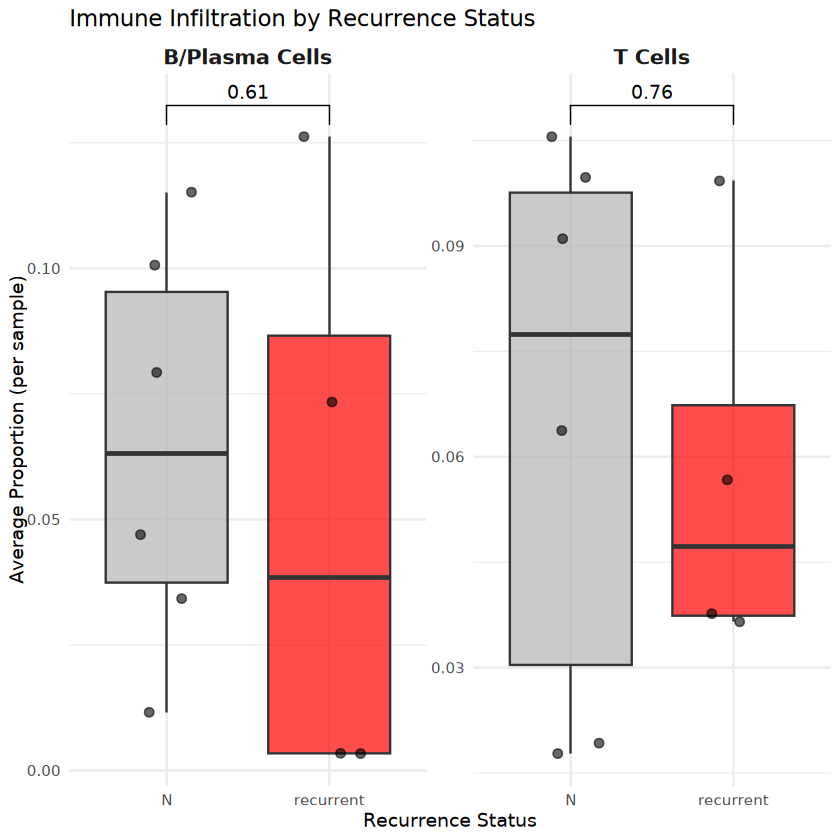

In [15]:
library(dplyr)
library(ggplot2)
library(tidyr)
library(ggpubr) # Library for adding statistics to plots

# 1. Aggregate Data by Sample
sample_agg <- merged_df %>%
  mutate(sample_id_p = gsub("_.*", "", sample_id_p)) %>%
  #filter(pathologist_label %in% c("tumour","tumour_stroma","stroma_TIL_tumour_interface","tumour-stroma_interface")) %>%
  group_by(sample_id_p, recurrent) %>%
  summarise(
    mean_T_cells = mean(T.cells, na.rm = TRUE),
    mean_B_Plasma = mean(B_Plasma.cells, na.rm = TRUE),
    .groups = "drop"
  )

# 2. Reshape for Plotting
plot_data <- sample_agg %>%
  pivot_longer(
    cols = c(mean_T_cells, mean_B_Plasma),
    names_to = "Cell_Type",
    values_to = "Proportion"
  ) %>%
  mutate(Cell_Type = recode(Cell_Type, 
                            "mean_T_cells" = "T Cells",
                            "mean_B_Plasma" = "B/Plasma Cells"))

# 3. Plot with Statistical Test
p<-ggplot(plot_data, aes(x = recurrent, y = Proportion, fill = recurrent)) +
  geom_boxplot(alpha = 0.7, outlier.shape = NA) +
  geom_jitter(width = 0.2, size = 2, alpha = 0.6) + 
  facet_wrap(~ Cell_Type, scales = "free_y") +
  
  # Add Statistical Test (Wilcoxon)
  stat_compare_means(
    comparisons = list(c("N", "recurrent")), # Define groups to compare
    method = "wilcox.test",                  # Use Wilcoxon/Mann-Whitney
    label = "p.format"                       # Show exact p-value (or "p.signif" for stars)
  ) +
  
  theme_minimal() +
  scale_fill_manual(values = c("N" = "grey70", "recurrent" = "red")) +
  labs(
    title = "Immune Infiltration by Recurrence Status",
    x = "Recurrence Status",
    y = "Average Proportion (per sample)"
  ) +
  theme(
    strip.text = element_text(size = 12, face = "bold"),
    legend.position = "none"
  )
  ggsave("Sfigure_immune_infiltration_percentage.pdf", plot = p, width = 6, height = 6, dpi = 300)
  p

Warning message in wilcox.test.default(c(0.0426666666666667, 0.0920454545454545, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(0.00266666666666667, 0.0670454545454545, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(0.0426666666666667, 0.0920454545454545, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(0.00266666666666667, 0.0670454545454545, :
“cannot compute exact p-value with ties”


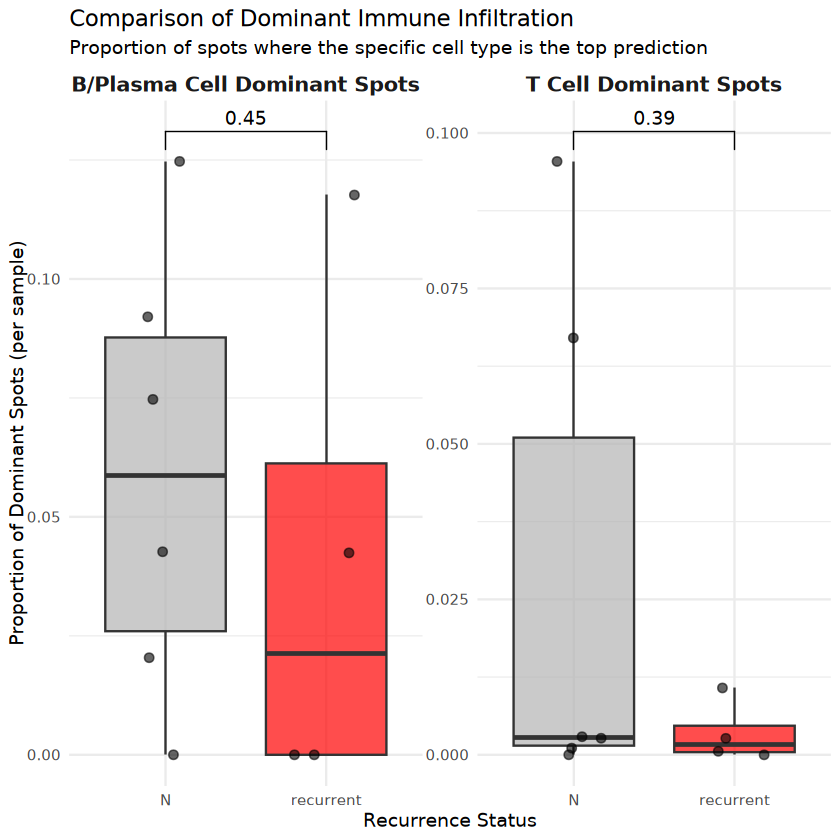

In [16]:
library(dplyr)
library(ggplot2)
library(tidyr)
library(ggpubr)

# 1. Define Cell Type Columns
# (Based on your provided Deconvolution results)
cell_types <- c("T.cells", "Malignant.cells", "B_Plasma.cells", "Endothelial.cells", 
                "Fibroblasts", "Macrophages", "Dendritic.cells", "Mast.cells", 
                "Myocytes", "Epithelial.cells")

# 2. Assign Dominant Cell Type & Aggregate
sample_dominance <- merged_df %>%
mutate(sample_id_p = gsub("_.*", "", sample_id_p)) %>%
  # Efficiently find the column name with the max value for each row
  mutate(dominant_type = cell_types[max.col(select(., all_of(cell_types)), ties.method = "first")]) %>%
  
  # Group by Sample and calculate proportions
  group_by(sample_id_p, recurrent) %>%
  summarise(
    prop_T_dominant = mean(dominant_type == "T.cells"),
    prop_B_dominant = mean(dominant_type == "B_Plasma.cells"),
    .groups = "drop"
  )

# 3. Reshape for Plotting
plot_data <- sample_dominance %>%
  pivot_longer(
    cols = c(prop_T_dominant, prop_B_dominant),
    names_to = "Metric",
    values_to = "Proportion"
  ) %>%
  mutate(Metric = recode(Metric, 
                         "prop_T_dominant" = "T Cell Dominant Spots",
                         "prop_B_dominant" = "B/Plasma Cell Dominant Spots"))

# 4. Plot
p<-ggplot(plot_data, aes(x = recurrent, y = Proportion, fill = recurrent)) +
  geom_boxplot(alpha = 0.7, outlier.shape = NA) +
  geom_jitter(width = 0.2, size = 2, alpha = 0.6) +
  facet_wrap(~ Metric, scales = "free_y") +
  
  # Add Statistical Test
  stat_compare_means(
    comparisons = list(c("N", "recurrent")),
    method = "wilcox.test",
    label = "p.format"
  ) +
  
  theme_minimal() +
  scale_fill_manual(values = c("N" = "grey70", "recurrent" = "red")) +
  labs(
    title = "Comparison of Dominant Immune Infiltration",
    subtitle = "Proportion of spots where the specific cell type is the top prediction",
    x = "Recurrence Status",
    y = "Proportion of Dominant Spots (per sample)"
  ) +
  theme(
    strip.text = element_text(size = 12, face = "bold"),
    legend.position = "none"
  )
  ggsave("Sfigure_immune_infiltration_dominance.pdf", plot = p, width = 6, height = 6, dpi = 300)
  p
  

# similarly for clustering

In [19]:
clustered_data<- readRDS("/QRISdata/Q4793/2023_delta_backup/analysis/cluster_outs/50pca_all.integrated_by_tissue_subcluster1_res0.1.RDS")

In [41]:
table(clustered_data@meta.data$sub.cluster, clustered_data@meta.data$cell_type)

     
      benign_salivary_tissue immune_cells normal_mucosa stroma
  0                       65          219            72    760
  1_0                     36          298             5    663
  1_1                      9           25             0    898
  2                        0            3            70    210
  3                        3            2             0    360
  4                        0            7             0     90
     
      stroma_TIL_tumour_interface tumour tumour_stroma tumour-stroma_interface
  0                           359   5225           123                     564
  1_0                         168    751            82                      70
  1_1                          82    509             7                     136
  2                             8   1463            22                     130
  3                             1     43             0                       3
  4                             0     51             3                   

In [40]:
table(clustered_data@meta.data$sub.cluster)


   0  1_0  1_1    2    3    4 
7387 2073 1666 1906  412  167 

In [25]:
head(deconv_data)

,spot_id,T.cells,Malignant.cells,B_Plasma.cells,Endothelial.cells,Fibroblasts,Macrophages,Dendritic.cells,Mast.cells,Myocytes,Epithelial.cells
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A_AAACAATCTACTAGCA.1,0.0339156820,0.24932546,1.784612e-02,0.050301775,0.387521012,2.733696e-02,9.828869e-03,0.030146173,1.327696e-03,0.192450257
2,A_AAACACCAATAACTGC.1,0.1872606251,0.54316466,1.889868e-02,0.020609050,0.009206359,2.670943e-02,7.687265e-03,0.021241523,1.017298e-02,0.155049433
3,A_AAACAGAGCGACTCCT.1,0.0001651826,0.04482861,2.086194e-03,0.001045572,0.908937679,4.949210e-06,3.219701e-06,0.035858211,1.513925e-08,0.007070366
4,A_AAACAGCTTTCAGAAG.1,0.0012202058,0.74096249,6.365967e-05,0.003430874,0.001671521,1.377202e-05,3.995428e-05,0.001035579,1.163261e-04,0.251445616
5,A_AAACAGGGTCTATATT.1,0.1961675984,0.58804007,6.194775e-03,0.004888528,0.022640330,1.347987e-05,4.570560e-04,0.015053089,3.505476e-03,0.163039600
6,A_AAACAGTGTTCCTGGG.1,0.0599121639,0.34664561,4.515415e-02,0.094164211,0.326348115,8.933175e-03,1.895184e-03,0.032661380,1.332037e-03,0.082953975


## columnwise

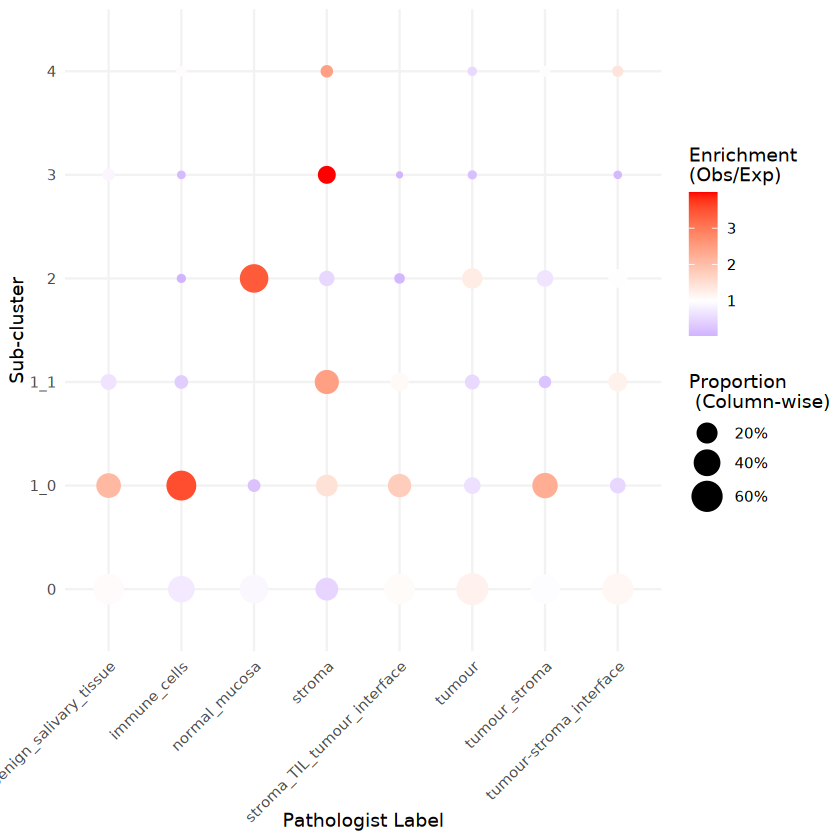

In [20]:
library(ggplot2)
library(dplyr)
library(tidyr)

# 1. Prepare Data
# Calculate counts, proportions, and enrichment
plot_data <- clustered_data@meta.data %>%
  # Count associations between cluster and cell_type
  group_by(sub.cluster, cell_type) %>%
  summarise(n = n(), .groups = "drop") %>%
  # Calculate Size Metric: Proportion within the Pathologist Label (Column)
  group_by(cell_type) %>%
  mutate(Proportion = n / sum(n)) %>%
  ungroup() %>%
  # Calculate Color Metric: Enrichment vs Global Background
  mutate(total_spots = sum(n)) %>%
  group_by(sub.cluster) %>%
  mutate(
    Global_Prop = sum(n) / unique(total_spots), # How big is this cluster globally?
    Enrichment = Proportion / Global_Prop       # Observed / Expected
  ) %>%
  ungroup()

# 2. Generate Bubble Plot
ggplot(plot_data, aes(x = cell_type, y = sub.cluster)) +
  geom_point(aes(size = Proportion, color = Enrichment)) +
 scale_color_gradient2(low = "blue", mid = "white", high = "red", midpoint = 1, name = "Enrichment\n(Obs/Exp)") +
 # Size: 0 to 100%
  scale_size_continuous(range = c(1, 8), labels = scales::percent, name = "Proportion \n (Column-wise) ") +
  theme_minimal() +
  labs(x = "Pathologist Label", y = "Sub-cluster") +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1),
    panel.grid.major = element_line(color = "grey95")
  )
  

## rowwise

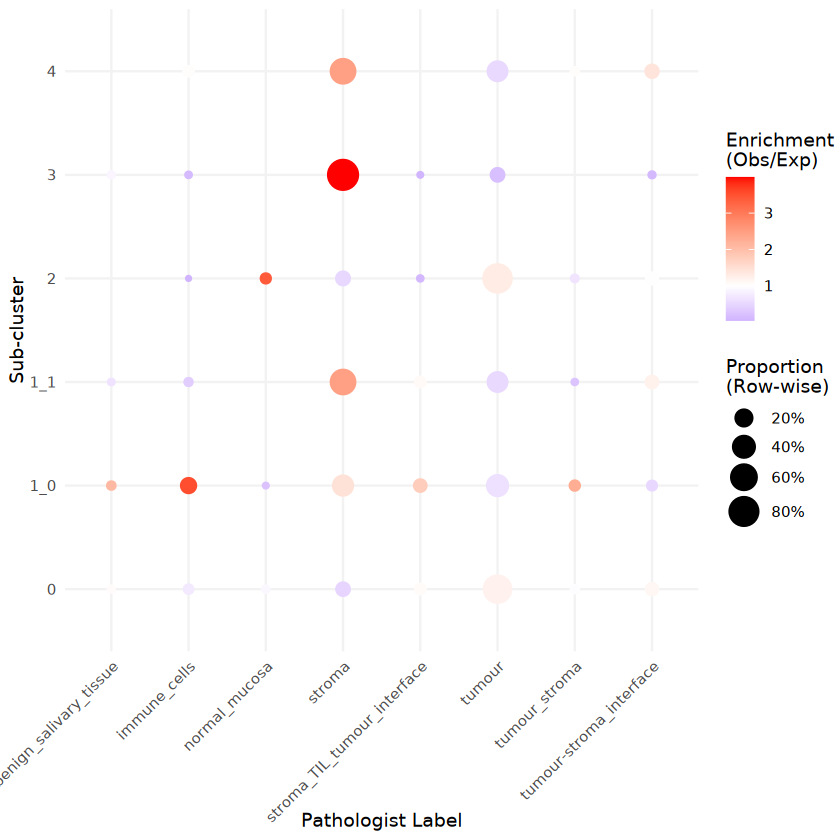

In [21]:
library(ggplot2)
library(dplyr)
library(tidyr)

# 1. Prepare Data
plot_data <- clustered_data@meta.data %>%
  # Count associations between cluster and cell_type
  group_by(sub.cluster, cell_type) %>%
  summarise(n = n(), .groups = "drop") %>%
  
  # --- Row-wise Calculation (Clusters sum to 1) ---
  group_by(sub.cluster) %>%
  mutate(Proportion = n / sum(n)) %>% # What % of this Cluster is defined by this Cell Type?
  ungroup() %>%
  
  # --- Enrichment Calculation ---
  mutate(total_spots = sum(n)) %>%
  group_by(cell_type) %>%
  mutate(
    # How common is this Cell Type in the whole dataset?
    Global_Prop_CellType = sum(n) / unique(total_spots),
    # Enrichment = Observed Prop in Cluster / Global Prevalence of Cell Type
    Enrichment = Proportion / Global_Prop_CellType
  ) %>%
  ungroup()

# 2. Generate Bubble Plot
p<-ggplot(plot_data, aes(x = cell_type, y = sub.cluster)) +
  geom_point(aes(size = Proportion, color = Enrichment)) +
  # Size: 0 to 100% (Row-wise)
  scale_size_continuous(range = c(1, 8), labels = scales::percent, name = "Proportion\n(Row-wise)") +
  # Color: Enrichment
  scale_color_gradient2(low = "blue",  high = "red", midpoint = 1, name = "Enrichment\n(Obs/Exp)") +
  theme_minimal() +
  labs(x = "Pathologist Label", y = "Sub-cluster") +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1),
    panel.grid.major = element_line(color = "grey95")
  )
    ggsave("Sfigure_pathologist_cluster_bubble.pdf", plot = p, width = 6, height = 6, dpi = 300)
  p

In [10]:
plot_data

sub.cluster,cell_type,n,Proportion,total_spots,Global_Prop_CellType,Enrichment
<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>
0,benign_salivary_tissue,65,0.008799242,13611,0.008302109,1.05988037
0,immune_cells,219,0.029646677,13611,0.040702373,0.72837710
0,normal_mucosa,72,0.009746853,13611,0.010800088,0.90247898
0,stroma,760,0.102883444,13611,0.219014033,0.46975731
0,stroma_TIL_tumour_interface,359,0.048598890,13611,0.045404452,1.07035516
0,tumour,5225,0.707323677,13611,0.590845640,1.19713785
0,tumour-stroma_interface,564,0.076350345,13611,0.067518919,1.13079929
0,tumour_stroma,123,0.016650873,13611,0.017412387,0.95626597
1_0,benign_salivary_tissue,36,0.017366136,13611,0.008302109,2.09177414
